# EDA 및 전처리

## 환경설정

In [13]:
# 기본 라이브러리
import os
import pandas as pd
import numpy as np

# 시각화 라이브러리
from matplotlib import font_manager, rc
from matplotlib import pyplot as plt
import seaborn as sns

# 전처리 라이브러리
from sklearn.preprocessing import StandardScaler

In [3]:
# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [4]:
data = pd.read_csv('C:/Users/User/Documents/공빅데/플젝데이터/1_수도권_회귀_데이터_삭제.csv',encoding='cp949')
data.head()

,SIG_CD,도시,자치구,총가구_가구원_계,집단시설_가구원수,가구원_모두_65세이상_가구수,당뇨병소계,고혈압소계,흡연자수,방문판매_총종사자수,...,대규모점포수,목욕장업수,유흥주점영업수,노래연습장업수,병원수,병원_의료인수,병원_입원실수,병원_병상수,의원수,확진자수
0,11110,서울특별시,종로구,154969,5494,8079,374,797,27739.451,44.0,...,2,0,54,70,6,4769,835,2890,56,84
1,11140,서울특별시,중구,130957,3018,6990,317,712,22917.475,586.0,...,15,4,359,110,5,1325,258,927,176,55
2,11170,서울특별시,용산구,227181,2815,11019,555,1112,25671.453,95.0,...,5,1,31,83,3,1000,215,837,90,113
3,11200,서울특별시,성동구,299688,3635,12806,772,1629,57540.096,143.0,...,2,4,37,190,13,1350,620,2695,147,110
4,11215,서울특별시,광진구,359766,6397,14132,856,2071,75550.860,347.0,...,3,2,16,338,11,1698,599,2259,171,121


## 결측치 제거

In [5]:
data = data.fillna(0)

In [6]:
data.describe()

,SIG_CD,총가구_가구원_계,집단시설_가구원수,가구원_모두_65세이상_가구수,당뇨병소계,고혈압소계,흡연자수,방문판매_총종사자수,N1인_가구수,N2인이상_가구,...,대규모점포수,목욕장업수,유흥주점영업수,노래연습장업수,병원수,병원_의료인수,병원_입원실수,병원_병상수,의원수,확진자수
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,29949.532468,336268.545455,5019.571429,13826.129870,1120.441558,2027.116883,62380.808234,478.961039,37513.571429,91377.662338,...,2.974026,3.389610,109.519481,204.337662,14.064935,1517.389610,614.168831,2561.532468,122.935065,121.974026
std,13620.341693,170451.858219,3651.482116,6332.862584,597.489892,1092.738568,33821.585152,400.018797,20604.853444,47118.302547,...,3.017380,2.362848,108.207721,122.370835,8.211573,1604.375769,400.733781,1596.329611,72.120392,80.913367
min,11110.000000,19040.000000,247.000000,1868.000000,84.000000,136.000000,4950.400000,0.000000,3473.000000,5200.000000,...,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,8.000000,30.000000,2.000000,0.000000
25%,11590.000000,224684.000000,2442.000000,9619.000000,762.000000,1296.000000,42729.216000,243.000000,23817.000000,59627.000000,...,1.000000,2.000000,37.000000,110.000000,9.000000,366.000000,315.000000,1483.000000,76.000000,64.000000
50%,41117.000000,351807.000000,4111.000000,12357.000000,1111.000000,2071.000000,59184.576000,403.000000,35234.000000,90197.000000,...,2.000000,3.000000,81.000000,191.000000,12.000000,1007.000000,545.000000,2164.000000,115.000000,115.000000
75%,41370.000000,440357.000000,6397.000000,18405.000000,1404.000000,2504.000000,78377.552000,565.000000,49683.000000,120806.000000,...,5.000000,5.000000,150.000000,279.000000,18.000000,2035.000000,831.000000,3476.000000,168.000000,163.000000
max,41830.000000,838635.000000,15925.000000,31089.000000,3030.000000,5784.000000,181145.160000,2253.000000,119863.000000,231682.000000,...,15.000000,9.000000,641.000000,591.000000,50.000000,7105.000000,2035.000000,9081.000000,354.000000,335.000000


## 이상치 대체

In [17]:
data_out = data.copy()

In [18]:
for i in range(3,len(data_x.columns)):
    ys = data_x.iloc[:,i]
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)

    ys[ys<lower_bound] = lower_bound
    ys[ys>upper_bound] = upper_bound

    data_out.iloc[:,i] = ys

<ipython-input-18-f47b7a2f9a4a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ys[ys<lower_bound] = lower_bound
<ipython-input-18-f47b7a2f9a4a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ys[ys>upper_bound] = upper_bound


In [19]:
data_out.iloc[:,3:-1].describe()

,총가구_가구원_계,집단시설_가구원수,가구원_모두_65세이상_가구수,당뇨병소계,고혈압소계,흡연자수,방문판매_총종사자수,N1인_가구수,N2인이상_가구,종교단체총종사자수,...,단란주점영업수,대규모점포수,목욕장업수,유흥주점영업수,노래연습장업수,병원수,병원_의료인수,병원_입원실수,병원_병상수,의원수
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,334350.974026,4871.766234,13826.129870,1110.129870,1996.168831,61355.639519,443.207792,37106.025974,91061.831169,931.525974,...,63.090909,2.922078,3.389610,102.727273,203.577922,13.818182,1420.701299,604.402597,2527.564935,121.909091
std,165061.140110,3266.445188,6332.862584,569.938878,1005.086281,30902.906691,291.617465,19218.317069,46231.042811,429.441267,...,43.252375,2.836632,2.362848,83.954896,120.099166,7.358270,1331.720744,371.169675,1479.318160,69.119687
min,19040.000000,247.000000,1868.000000,84.000000,136.000000,4950.400000,0.000000,3473.000000,5200.000000,72.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,8.000000,30.000000,2.000000
25%,224684.000000,2442.000000,9619.000000,762.000000,1296.000000,42729.216000,243.000000,23817.000000,59627.000000,623.000000,...,34.000000,1.000000,2.000000,37.000000,110.000000,9.000000,366.000000,315.000000,1483.000000,76.000000
50%,351807.000000,4111.000000,12357.000000,1111.000000,2071.000000,59184.576000,403.000000,35234.000000,90197.000000,867.000000,...,53.000000,2.000000,3.000000,81.000000,191.000000,12.000000,1007.000000,545.000000,2164.000000,115.000000
75%,440357.000000,6397.000000,18405.000000,1404.000000,2504.000000,78377.552000,565.000000,49683.000000,120806.000000,1232.000000,...,92.000000,5.000000,5.000000,150.000000,279.000000,18.000000,2035.000000,831.000000,3476.000000,168.000000
max,763866.500000,12329.500000,31089.000000,2367.000000,4316.000000,131850.056000,1048.000000,88482.000000,212574.500000,2145.500000,...,179.000000,11.000000,9.000000,319.500000,532.500000,31.500000,4538.500000,1605.000000,6465.500000,306.000000


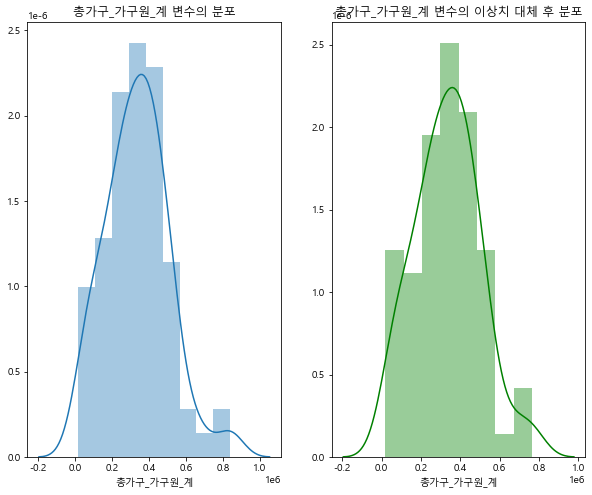

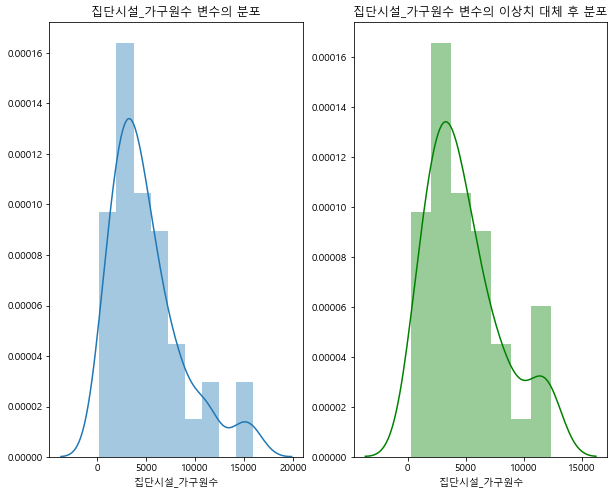

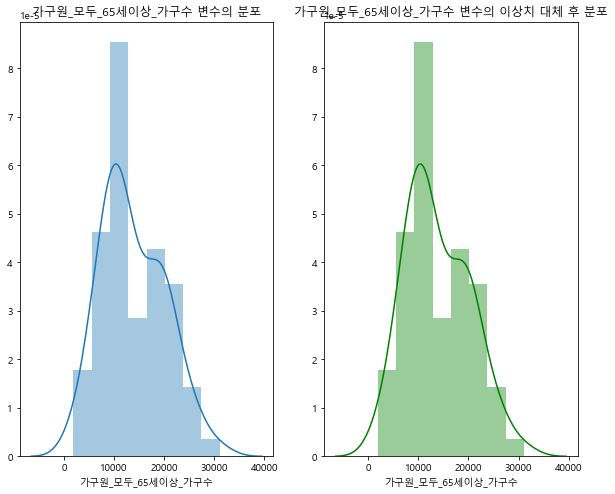

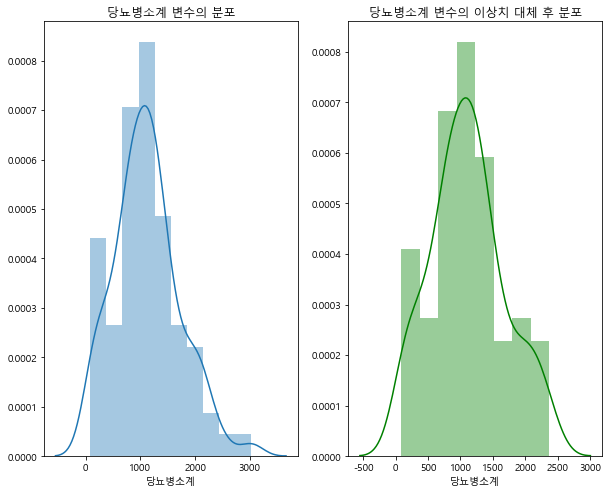

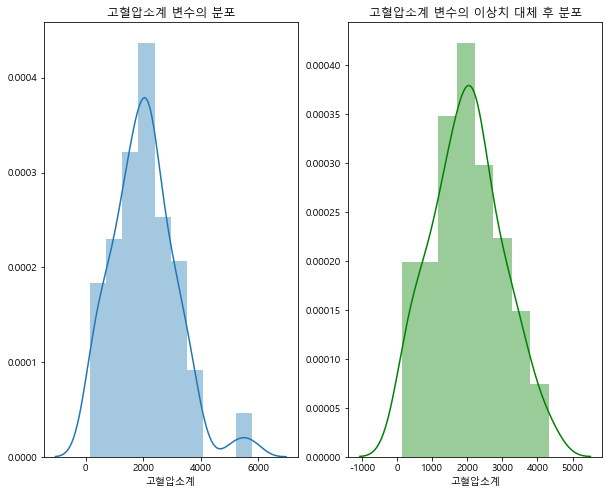

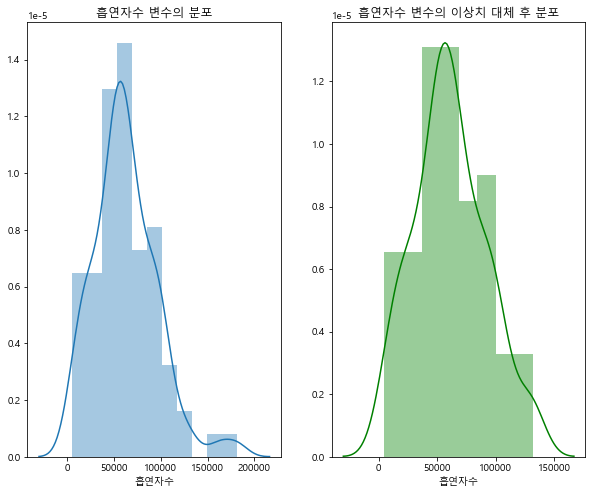

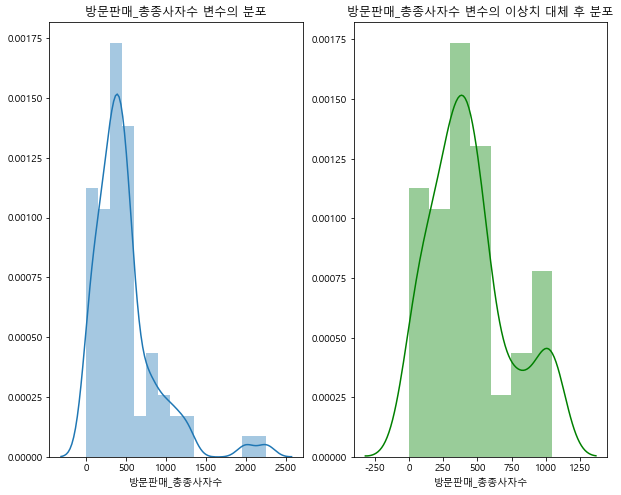

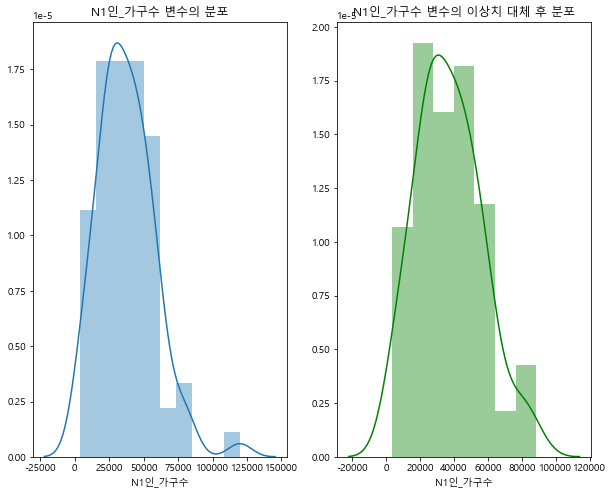

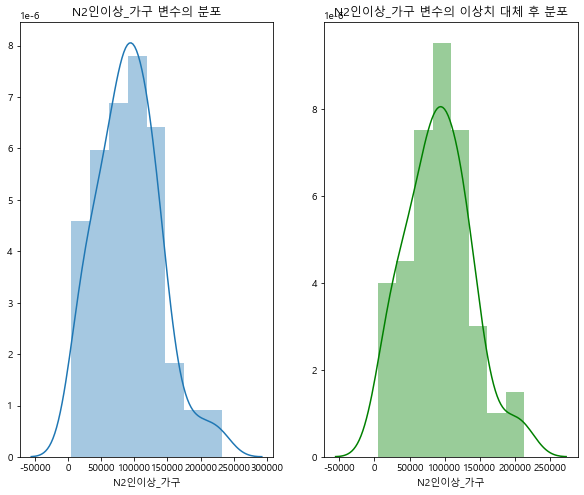

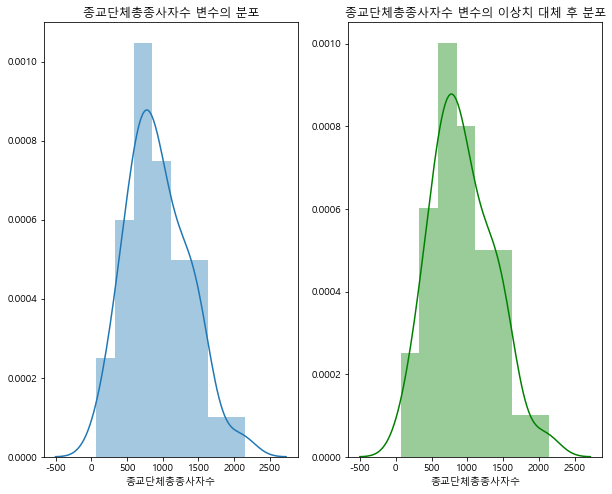

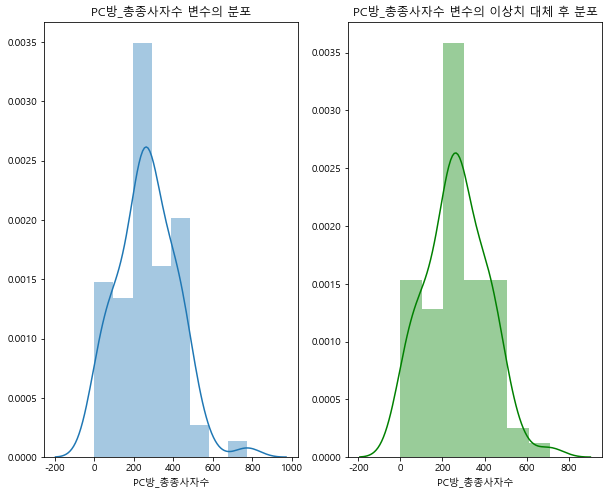

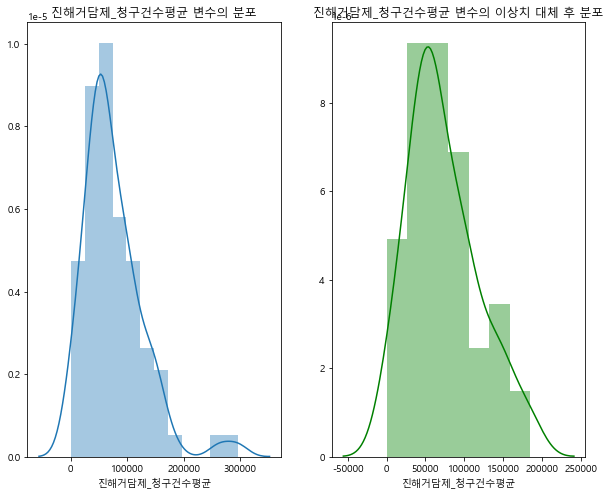

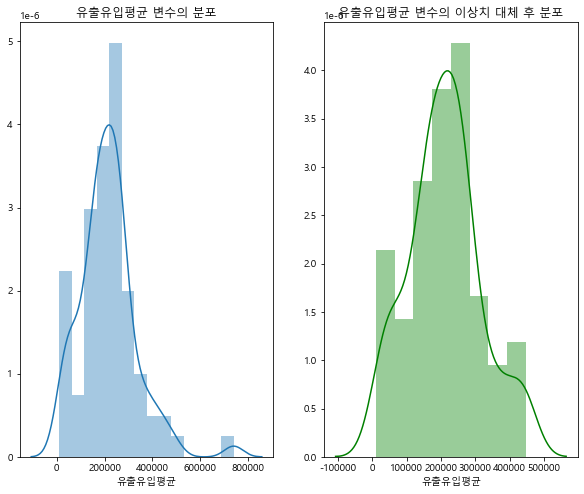

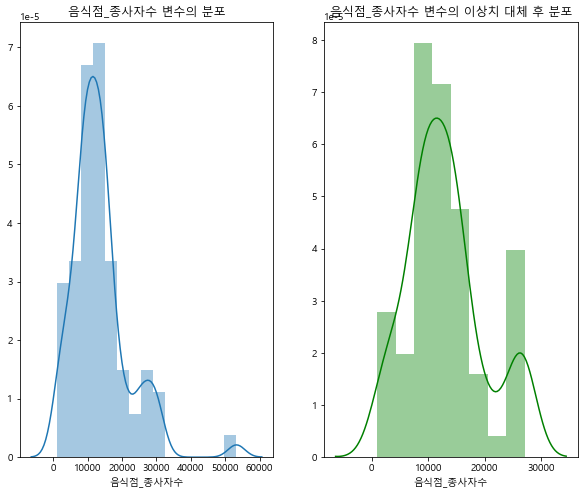

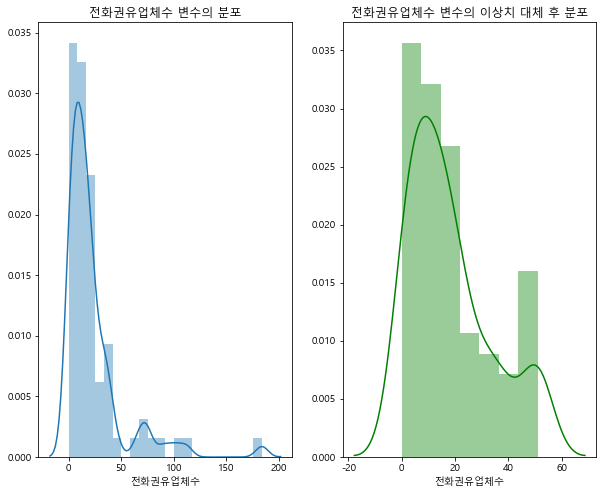

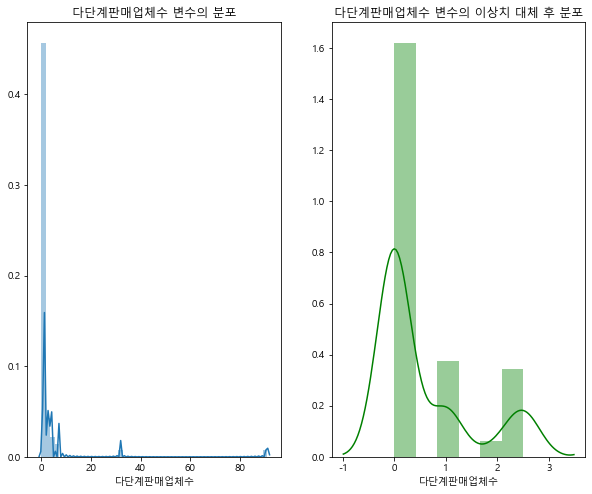

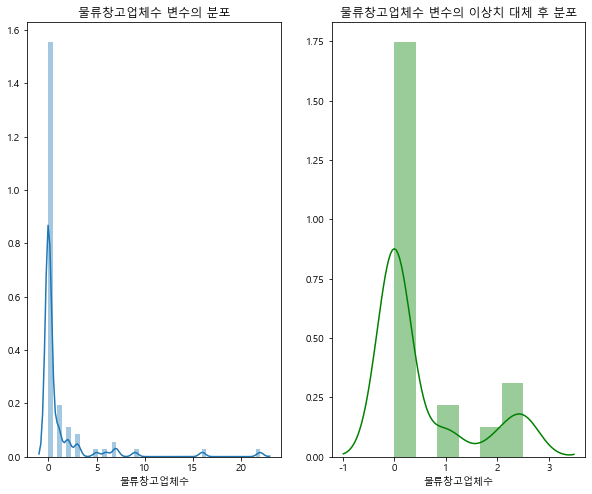

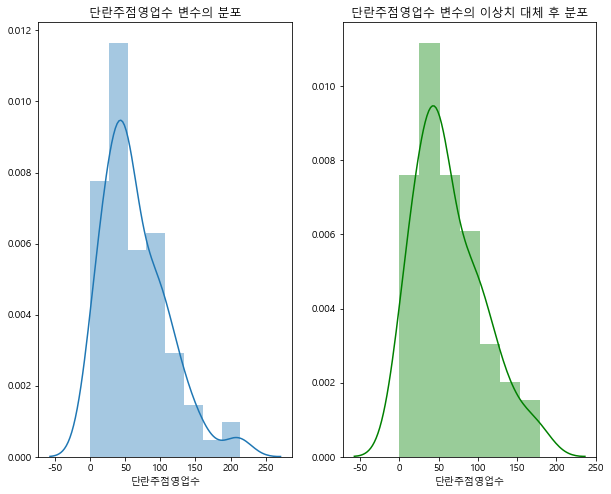

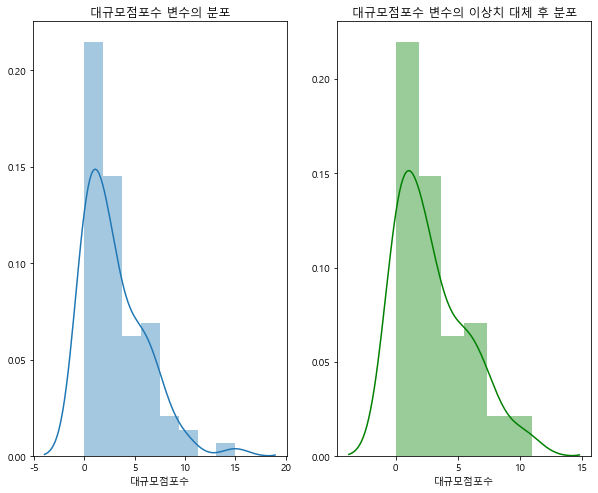

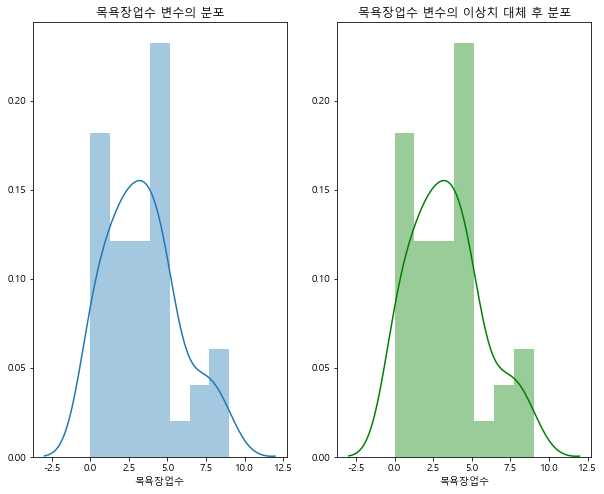

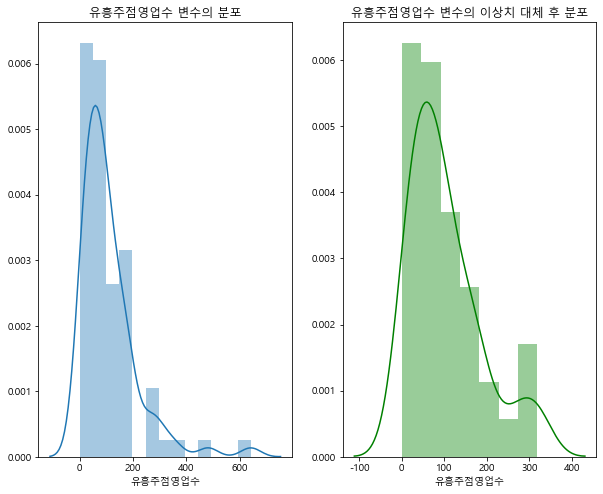

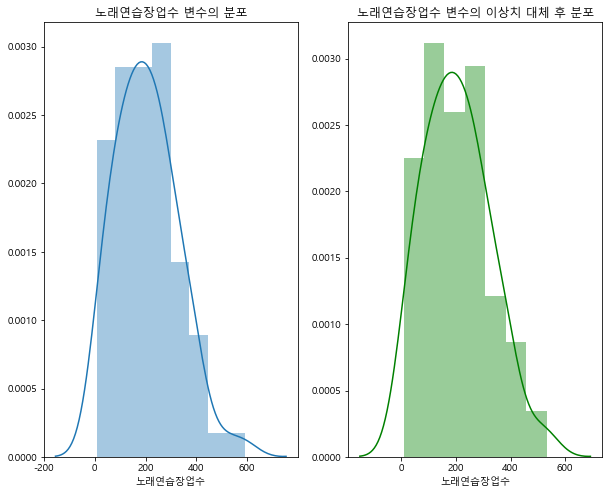

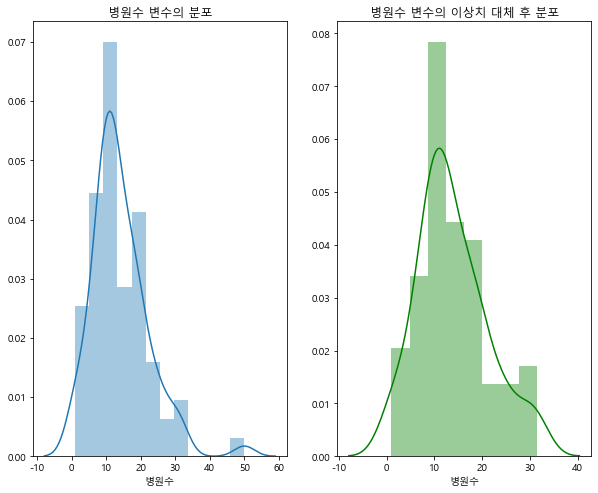

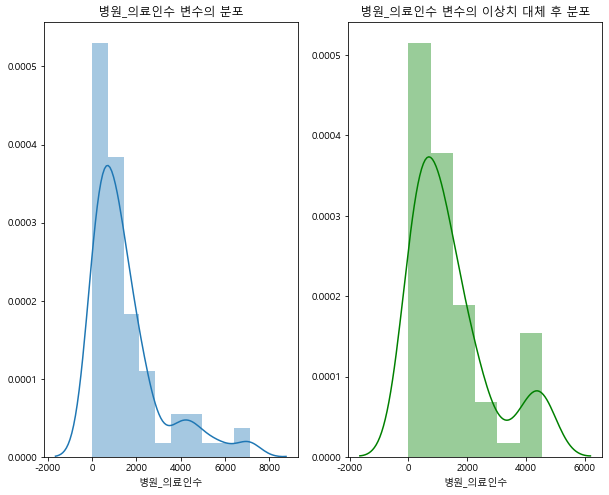

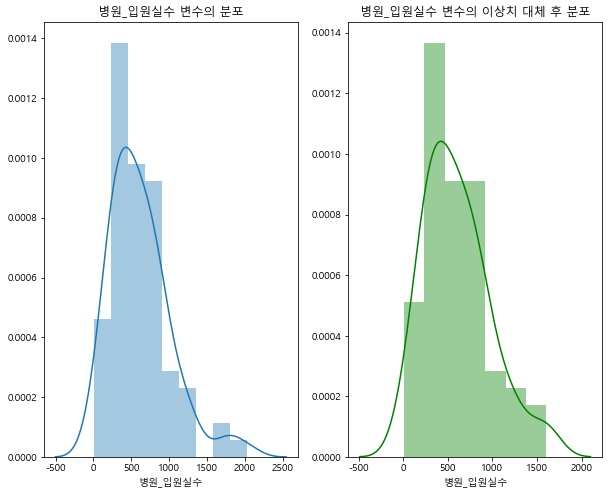

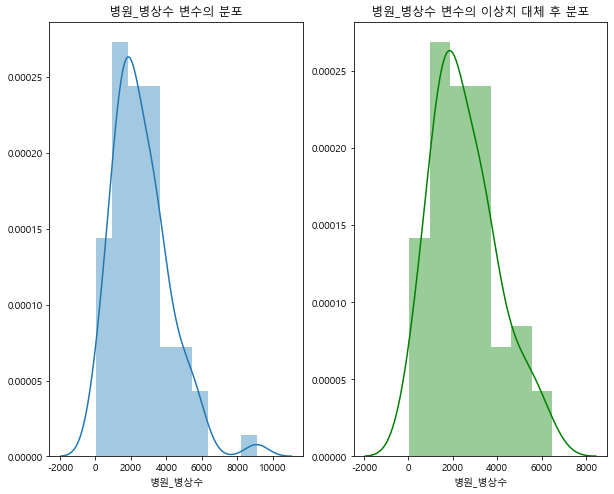

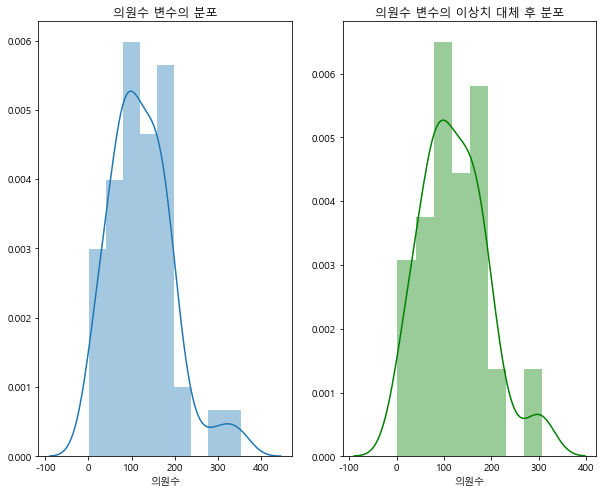

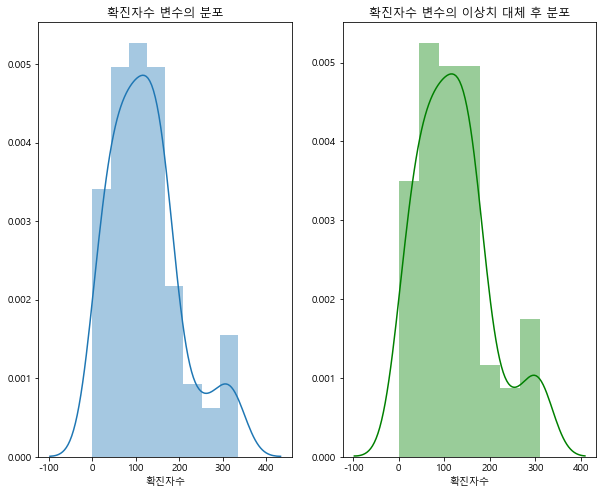

In [20]:
for col in data.columns[3:]:
    plt.figure(figsize=(10,8))
    ax = plt.subplot(1,2,1)
    sns.distplot(data.loc[:,col])
    plt.title(col + ' 변수의 분포')

    ax = plt.subplot(1,2,2)
    sns.distplot(data_out.loc[:,col],color='green')    
    plt.title(col+' 변수의 이상치 대체 후 분포')
    plt.show()

### 왜도, 첨도 확인

In [30]:
for col in data.columns[3:-1]: 
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(data[col].skew()) ,
          ' ' , 'Kurtosis: {:05.2f}'.format(data[col].kurt()) )

# raw 데이터에서 왜도 첨도
# 왜도 : 다단계판매업체수, 물류창고업체수

총가구_가구원_계       Skewness: 00.47   Kurtosis: 00.63
집단시설_가구원수       Skewness: 01.26   Kurtosis: 01.34
가구원_모두_65세이상_가구수 Skewness: 00.43   Kurtosis: -0.41
당뇨병소계           Skewness: 00.55   Kurtosis: 00.49
고혈압소계           Skewness: 00.69   Kurtosis: 01.28
흡연자수            Skewness: 00.84   Kurtosis: 01.52
방문판매_총종사자수      Skewness: 02.13   Kurtosis: 06.37
N1인_가구수         Skewness: 00.97   Kurtosis: 02.25
N2인이상_가구        Skewness: 00.48   Kurtosis: 00.46
종교단체총종사자수       Skewness: 00.47   Kurtosis: 00.00
PC방_총종사자수       Skewness: 00.40   Kurtosis: 00.63
진해거담제_청구건수평균    Skewness: 01.62   Kurtosis: 04.25
유출유입평균          Skewness: 01.23   Kurtosis: 04.03
음식점_종사자수        Skewness: 01.80   Kurtosis: 05.86
전화권유업체수         Skewness: 03.02   Kurtosis: 11.63
다단계판매업체수        Skewness: 07.46   Kurtosis: 59.13
물류창고업체수         Skewness: 04.26   Kurtosis: 20.65
단란주점영업수         Skewness: 01.08   Kurtosis: 01.28
대규모점포수          Skewness: 01.32   Kurtosis: 02.21
목욕장업수           Skewness: 00.52   Kurtosis: -0.31

In [31]:
for col in data_x.columns[3:-1]: 
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(data_out[col].skew()) ,
          ' ' , 'Kurtosis: {:05.2f}'.format(data_out[col].kurt()) )
    
# 이상치 제거 후 전부 2 이하

총가구_가구원_계       Skewness: 00.26   Kurtosis: 00.01
집단시설_가구원수       Skewness: 00.86   Kurtosis: -0.05
가구원_모두_65세이상_가구수 Skewness: 00.43   Kurtosis: -0.41
당뇨병소계           Skewness: 00.27   Kurtosis: -0.37
고혈압소계           Skewness: 00.16   Kurtosis: -0.44
흡연자수            Skewness: 00.29   Kurtosis: -0.32
방문판매_총종사자수      Skewness: 00.69   Kurtosis: -0.23
N1인_가구수         Skewness: 00.45   Kurtosis: -0.08
N2인이상_가구        Skewness: 00.37   Kurtosis: 00.10
종교단체총종사자수       Skewness: 00.47   Kurtosis: -0.01
PC방_총종사자수       Skewness: 00.25   Kurtosis: 00.04
진해거담제_청구건수평균    Skewness: 00.67   Kurtosis: -0.10
유출유입평균          Skewness: 00.28   Kurtosis: -0.05
음식점_종사자수        Skewness: 00.60   Kurtosis: -0.10
전화권유업체수         Skewness: 00.91   Kurtosis: -0.20
다단계판매업체수        Skewness: 01.34   Kurtosis: 00.24
물류창고업체수         Skewness: 01.44   Kurtosis: 00.36
단란주점영업수         Skewness: 00.79   Kurtosis: 00.10
대규모점포수          Skewness: 00.93   Kurtosis: 00.09
목욕장업수           Skewness: 00.52   Kurtosis: -0.31

## 로그변환

In [22]:
res = []
for col in data.columns[3:-1]:     
    res.append((data[col].skew()>=2) | (data[col].kurt()>=2))
data.iloc[:,3:-1].columns[res]

Index(['방문판매_총종사자수', 'N1인_가구수', '진해거담제_청구건수평균', '유출유입평균', '음식점_종사자수',
       '전화권유업체수', '다단계판매업체수', '물류창고업체수', '대규모점포수', '유흥주점영업수', '병원수', '병원_의료인수',
       '병원_입원실수', '병원_병상수'],
      dtype='object')

In [23]:
data_log = data.copy()

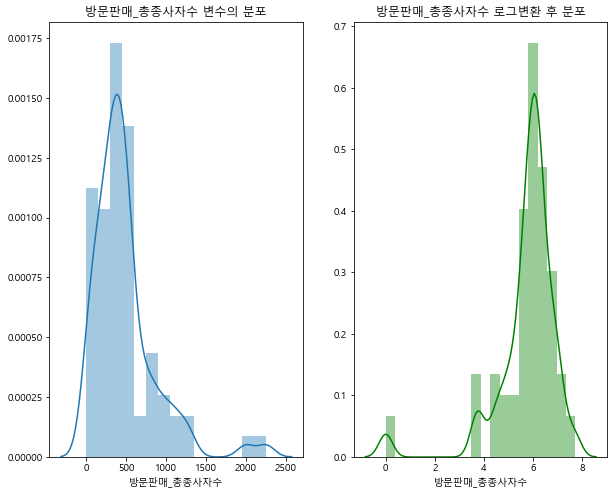

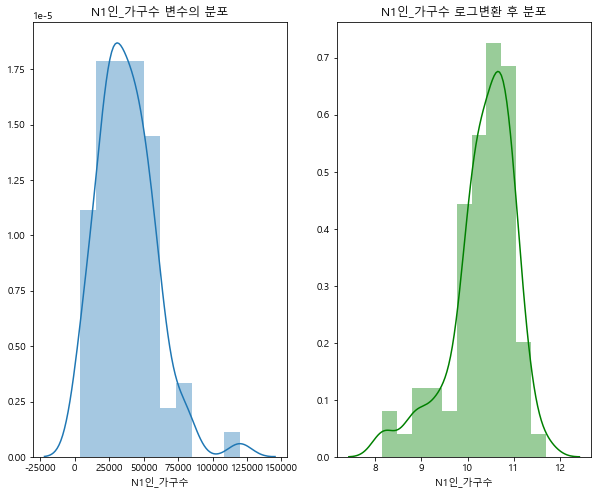

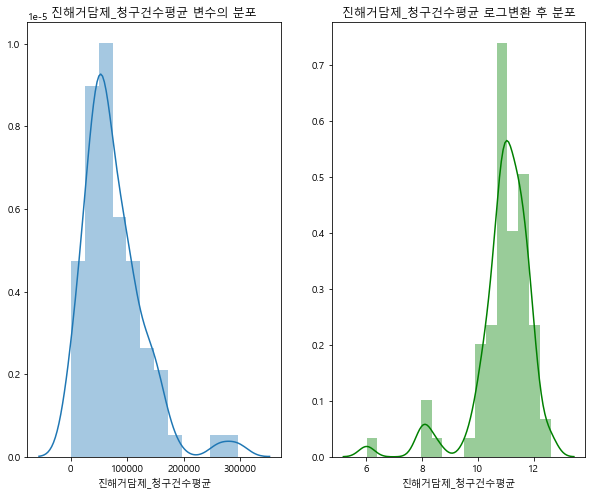

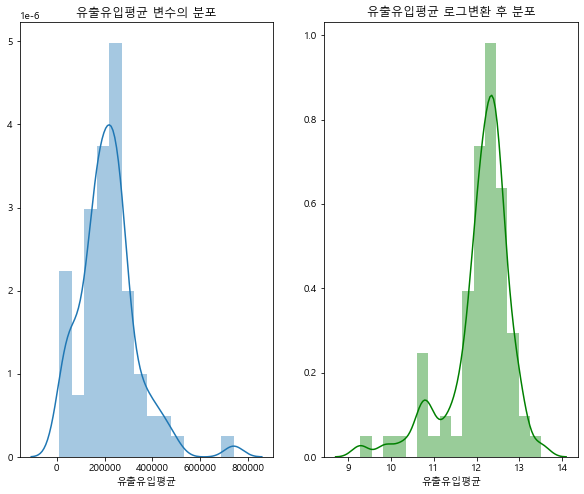

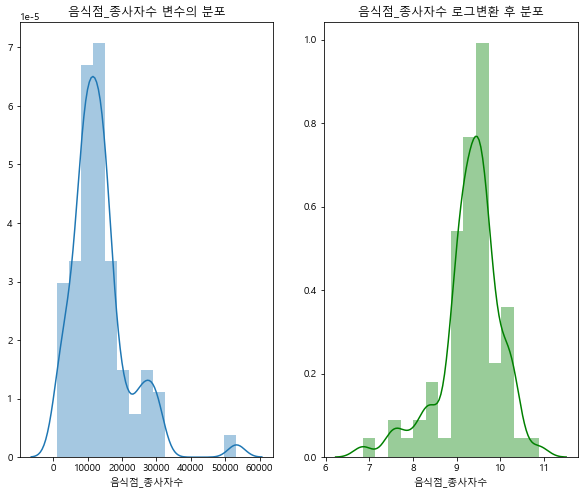

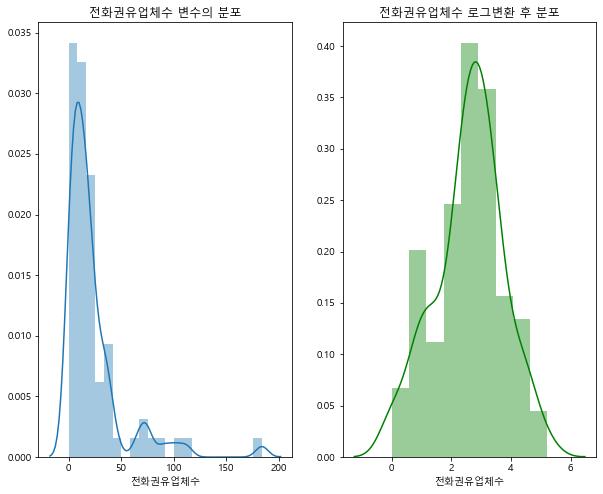

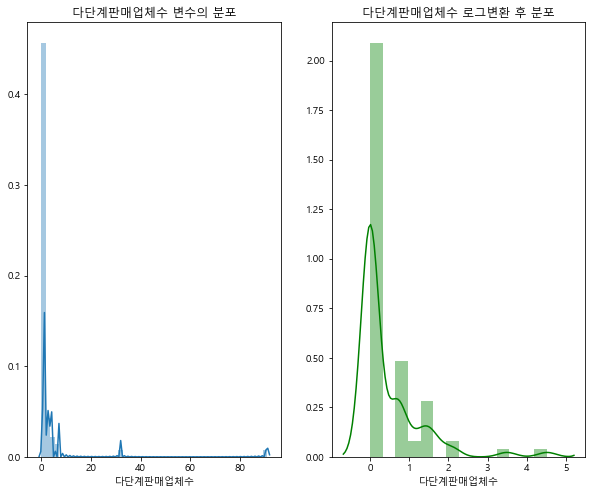

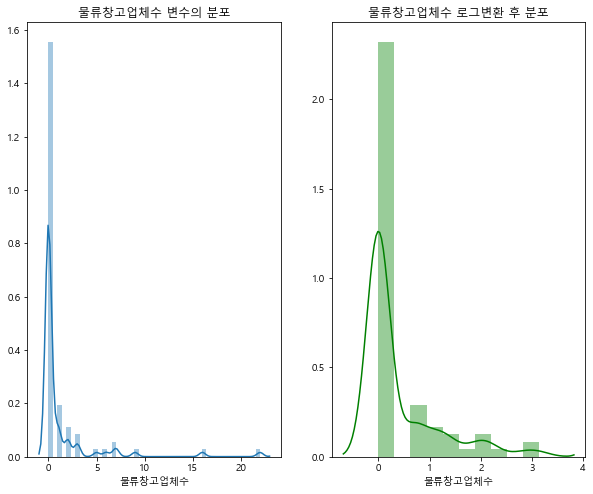

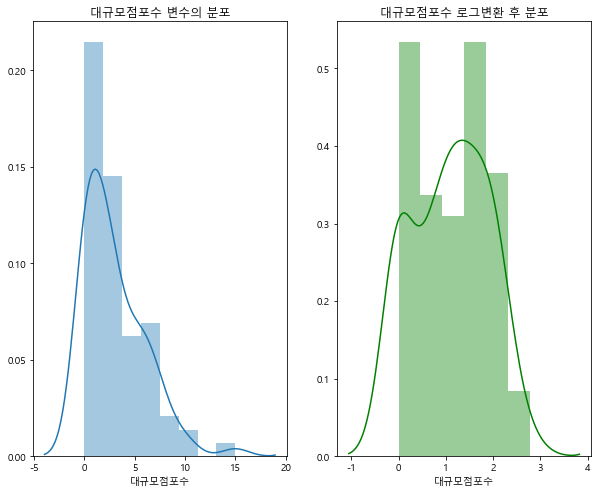

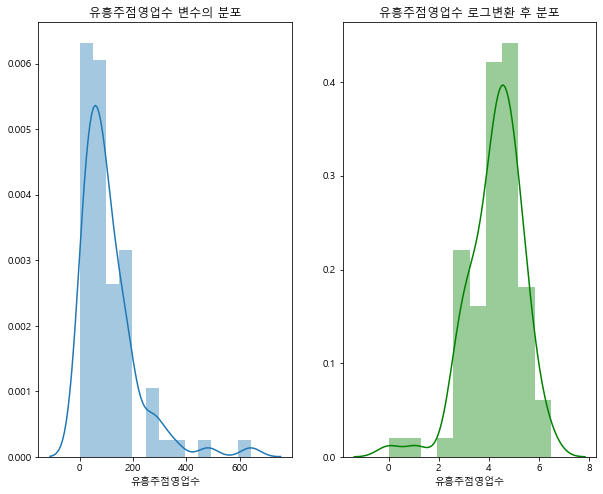

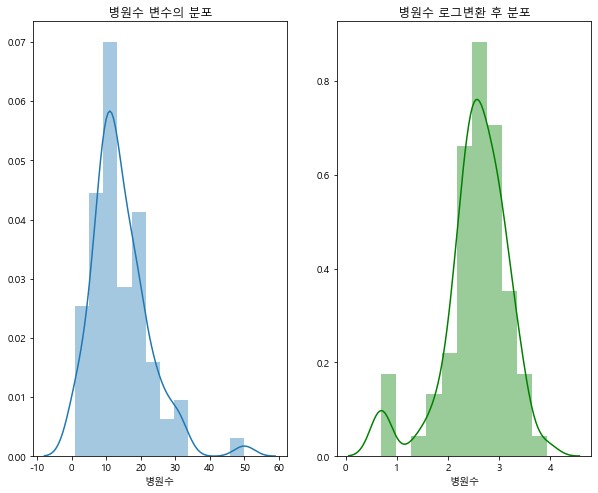

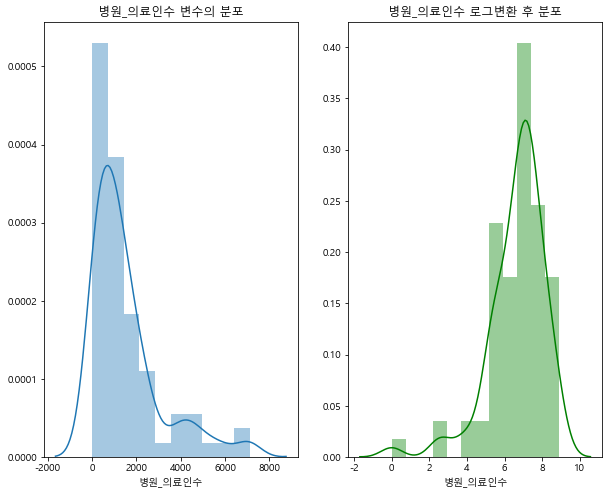

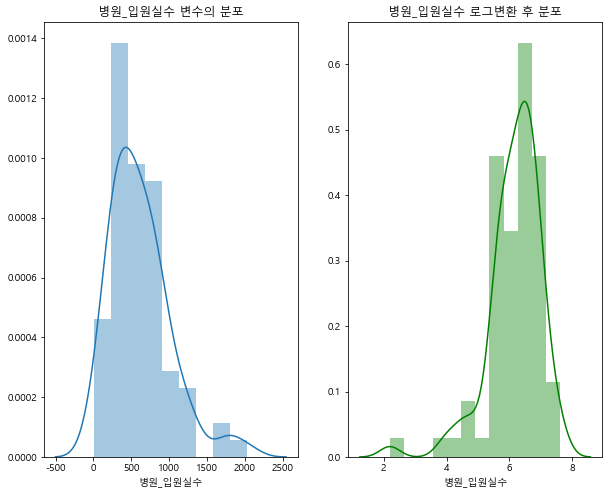

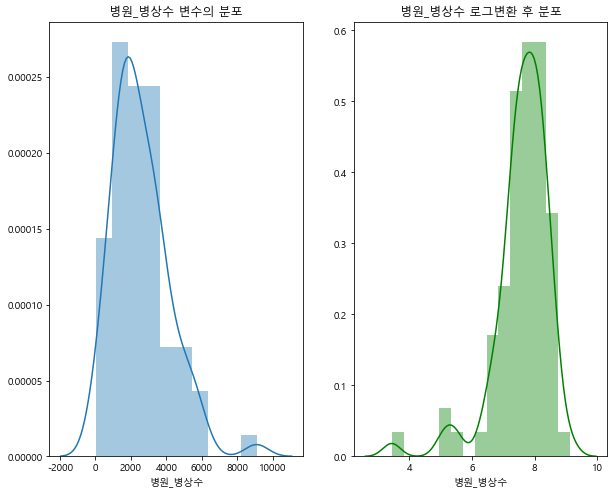

In [24]:
for col in data_log.iloc[:,3:-1].columns[res]:
    plt.figure(figsize=(10,8))
    ax = plt.subplot(1,2,1)
    sns.distplot(data.loc[:,col])
    plt.title(col + ' 변수의 분포')

    ax = plt.subplot(1,2,2)
    data_log[col] = np.log1p(data_log.loc[:,col])
    sns.distplot(data_log[col], color='green')
    plt.title(col+' 로그변환 후 분포')
    
    plt.show()

In [25]:
data_log.describe()

,SIG_CD,총가구_가구원_계,집단시설_가구원수,가구원_모두_65세이상_가구수,당뇨병소계,고혈압소계,흡연자수,방문판매_총종사자수,N1인_가구수,N2인이상_가구,...,대규모점포수,목욕장업수,유흥주점영업수,노래연습장업수,병원수,병원_의료인수,병원_입원실수,병원_병상수,의원수,확진자수
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,29949.532468,336268.545455,5019.571429,13826.129870,1120.441558,2027.116883,62380.808234,5.745004,10.347369,91377.662338,...,1.090878,3.389610,4.257767,204.337662,2.549285,6.656164,6.162202,7.592140,122.935065,121.974026
std,13620.341693,170451.858219,3651.482116,6332.862584,597.489892,1092.738568,33821.585152,1.260731,0.686891,47118.302547,...,0.789306,2.362848,1.077994,122.370835,0.631500,1.493669,0.856036,0.879461,72.120392,80.913367
min,11110.000000,19040.000000,247.000000,1868.000000,84.000000,136.000000,4950.400000,0.000000,8.153062,5200.000000,...,0.000000,0.000000,0.000000,8.000000,0.693147,0.000000,2.197225,3.433987,2.000000,0.000000
25%,11590.000000,224684.000000,2442.000000,9619.000000,762.000000,1296.000000,42729.216000,5.497168,10.078197,59627.000000,...,0.693147,2.000000,3.637586,110.000000,2.302585,5.905362,5.755742,7.302496,76.000000,64.000000
50%,41117.000000,351807.000000,4111.000000,12357.000000,1111.000000,2071.000000,59184.576000,6.001415,10.469795,90197.000000,...,1.098612,3.000000,4.406719,191.000000,2.564949,6.915723,6.302619,7.680176,115.000000,115.000000
75%,41370.000000,440357.000000,6397.000000,18405.000000,1404.000000,2504.000000,78377.552000,6.338594,10.813438,120806.000000,...,1.791759,5.000000,5.017280,279.000000,2.944439,7.618742,6.723832,8.153925,168.000000,163.000000
max,41830.000000,838635.000000,15925.000000,31089.000000,3030.000000,5784.000000,181145.160000,7.720462,11.694113,231682.000000,...,2.772589,9.000000,6.464588,591.000000,3.931826,8.868695,7.618742,9.114050,354.000000,335.000000


## 정규화

In [26]:
ss = StandardScaler()
data_train_scale = ss.fit_transform(data_out.iloc[:,3:-1])
data_train_scale = pd.DataFrame(data_train_scale)
data_train_scale.columns = data_out.iloc[:,3:-1].columns

In [27]:
res_df = pd.concat([data_out.iloc[:,:3],data_train_scale,data_out.iloc[:,-1]],axis=1)
res_df.head()

,SIG_CD,도시,자치구,총가구_가구원_계,집단시설_가구원수,가구원_모두_65세이상_가구수,당뇨병소계,고혈압소계,흡연자수,방문판매_총종사자수,...,대규모점포수,목욕장업수,유흥주점영업수,노래연습장업수,병원수,병원_의료인수,병원_입원실수,병원_병상수,의원수,확진자수
0,11110,서울특별시,종로구,-1.093887,0.191742,-0.913460,-1.300064,-1.200924,-1.094933,-1.377920,...,-0.327192,-1.443952,-0.584204,-1.119524,-1.069470,2.356533,0.625346,0.246608,-0.959803,84.0
1,11140,서울특별시,중구,-1.240314,-0.571239,-1.086548,-1.400731,-1.286048,-1.251993,0.492867,...,2.866390,0.260022,2.598946,-0.784282,-1.206263,-0.072334,-0.939393,-1.089056,0.787700,55.0
2,11170,서울특별시,용산구,-0.653532,-0.633794,-0.446171,-0.980404,-0.885463,-1.162291,-1.201887,...,0.737335,-1.017958,-0.859957,-1.010570,-1.479848,-0.317980,-1.056002,-1.150294,-0.464677,113.0
3,11200,서울특별시,성동구,-0.211378,-0.381110,-0.162141,-0.597164,-0.367706,-0.124278,-1.036208,...,-0.327192,0.260022,-0.788022,-0.113797,-0.111921,-0.053438,0.042298,0.113926,0.365387,110.0
4,11215,서울특별시,광진구,0.154983,0.470002,0.048616,-0.448814,0.074941,0.462361,-0.332074,...,0.027650,-0.591965,-1.039796,1.126599,-0.385507,0.209591,-0.014651,-0.182737,0.714888,121.0


In [147]:
res_df.to_csv('플젝데이터/1_수도권_회귀_데이터_최종전처리.csv',index=False, encoding='cp949')